## Livro

Bibliotecas - Pag 15 e 16

Cookiecutter (Pag 21): https://github.com/drivendata/cookiecutter-data-science

## **Bibliotecas (Import)**


In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import (
    train_test_split
    )

from sklearn import (
    preprocessing
    )

In [61]:
#!pip uninstall pandas-profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [62]:
import warnings
warnings.filterwarnings('ignore')

## **Coleta de dados**


In [63]:
df = pd.read_csv("titanic.csv").drop(1309)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [64]:
df = df.drop(columns=[
    "name",
    "ticket",
    "home.dest",
    "boat",
    "body",
    "cabin"
])

df = pd.get_dummies(df, drop_first=True) #substituindo colunas categoricas e dropando coluna correlacionada
y = df.survived
X = df.drop(columns='survived')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
    ) 

In [65]:
from sklearn.experimental import (
    enable_iterative_imputer
)
from sklearn.impute import IterativeImputer

num_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male']

imputer = IterativeImputer()
imputed = imputer.fit_transform(X_train[num_cols])
X_train.loc[:,num_cols] = imputed
imputed = imputer.transform(X_test[num_cols])
X_test.loc[:,num_cols] = imputed

In [66]:
cols = "pclass,age,sibsp,parch,fare".split(",")
sca = preprocessing.StandardScaler()

normalize_train = sca.fit_transform(X_train[cols])
X_train = pd.DataFrame(normalize_train, columns=cols).join(X_train[['sex_male','embarked_Q','embarked_S']].reset_index(drop=True))

normalize_test = sca.transform(X_test[cols])
X_test = pd.DataFrame(normalize_test, columns=cols).join(X_test[['sex_male','embarked_Q','embarked_S']].reset_index(drop=True))

In [67]:
X_test

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0.825248,0.496095,-0.498616,-0.432553,-0.502719,1.0,0,1
1,0.825248,-0.673461,0.425943,0.686709,-0.339518,1.0,0,0
2,0.825248,-0.128452,-0.498616,-0.432553,-0.488120,1.0,0,1
3,0.825248,-0.128538,-0.498616,-0.432553,-0.485199,1.0,0,1
4,0.825248,-0.128371,-0.498616,-0.432553,-0.490881,1.0,1,0
...,...,...,...,...,...,...,...,...
388,-0.363317,0.106243,-0.498616,-0.432553,-0.391446,1.0,0,1
389,0.825248,-0.790416,-0.498616,-0.432553,-0.500745,1.0,0,0
390,-0.363317,0.963917,-0.498616,-0.432553,-0.391446,1.0,0,1
391,0.825248,-0.282937,-0.498616,-0.432553,-0.485199,0.0,0,1


In [68]:
X = pd.concat([X_train, X_test]).reset_index(drop=True)
y = pd.concat([y_train, y_test]).reset_index(drop=True)

## **Logistic Regresion**

Parâmetros da instância:

**penalty=** Qual tipo de regularização será aplicado ao modelo. O parâmetro penalty pode assumir dois valores: "l1" ou "l2".


**C** = parâmetro de regularização que controla o quão fortemente o modelo tenta minimizar o erro, usado evitar o overfitting. Quanto menor o valor de C, maior será o grau de regularização e, portanto, o modelo será menos complexo.

**max_iter** = Se você aumentar o número de iterações, o modelo pode ser treinado por mais tempo, o que pode levar a resultados mais precisos. No entanto, isso também pode levar a um aumento no tempo de treinamento. Por outro lado, se você diminuir o número de iterações, o tempo de treinamento será menor, mas os resultados podem ser menos precisos.


**multi_class**='ovr'
Use um versus descanso para cada aula, ou para 'multinomial', treine uma aula.

**class_weight**= Um parâmetro que pode ser usado para dar mais peso a determinadas classes no conjunto de treinamento. Isso pode ser útil se o conjunto de treinamento tiver classes desbalanceadas.

Dicionário ou 'balanced'.

**solver**= Parâmetro que especifica qual algoritmo de otimização será usado para ajustar os coeficientes do modelo. Descobre quais features devem ser usadas pelo modelo.

'liblinear' é bom para pequenos dados. 'newton-cg', 'sag', 'saga'e 'lbfgs'são para dados multiclasse. 'liblinear'e 'saga' só trabalho com 'l1' penalidade. Os outros trabalham com 'l2'.


**njobs**= 1
Número de CPUs a serem usadas. -1 é tudo. Só funciona com multi_class='over'e solver não é 'liblinear'.


Criando o modelo

In [69]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

Acurácia do modelo

In [70]:
lr.score(X_test, y_test)

0.8015267175572519

Previsão de uma row (a probabilidade maior de 0.5)

In [71]:
lr.predict(X.iloc[[0]])

array([0.])

Probabilidade de uma row ser de um determinado label

In [72]:
lr.predict_proba(X.iloc[[0]])

array([[0.89837832, 0.10162168]])

Probabilidade logaritma de uma row ser de um determinado label

In [73]:
lr.predict_log_proba(X.iloc[[0]])

array([[-0.107164  , -2.28649842]])

Preveja pontuações de confiança para amostras. Previsão bruta que é transformada em probabilidade usando a função logística. A escala logarítmica é mais adequada para trabalhar com grandes diferenças de probabilidade
 
A pontuação de confiança para uma amostra é proporcional à distância sinalizada dessa amostra ao hiperplano. 

Menos de 0.5 = probabilidade maior de prever a classe 0
Mais de 0.5 = probabilidade maior de prever a classe 1

In [74]:
lr.decision_function(X.iloc[[0]])

array([-2.17933441])

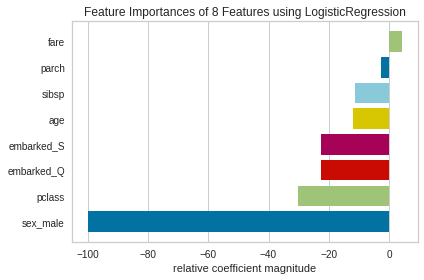

In [75]:
from yellowbrick.model_selection import FeatureImportances
fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(lr)
fi_viz.fit(X, y)
fi_viz.poof()

In [76]:
print(f'''Coeficiente das features: {lr.coef_}

Intercept : {lr.intercept_}

Quantidade de features : {lr.n_features_in_} 

Lista de features: {lr.feature_names_in_}

Número de iterações: {lr.n_iter_}''')

Coeficiente das features: [[-0.73722927 -0.29517584 -0.27271833 -0.06226467  0.10199704 -2.4272543
  -0.55216905 -0.54767191]]

Intercept : [1.25133813]

Quantidade de features : 8 

Lista de features: ['pclass' 'age' 'sibsp' 'parch' 'fare' 'sex_male' 'embarked_Q'
 'embarked_S']

Número de iterações: [19]


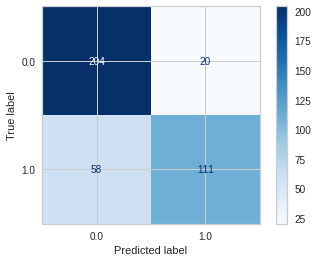

In [77]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(lr, X_test, y_test, cmap='Blues', values_format='.3g')

## **Naive Bayes**

Parâmetros da instância:

**priors** = Por exemplo, se você tiver um conjunto de dados em que 50% das pessoas têm a doença e 50% não têm, o parâmetro prior para cada classe será 0,5. No entanto, você também pode definir o valor dos priors manualmente se quiser dar mais peso a uma classe em particular.
Probabilidades prévias de classes.

**var_smoothing** = Ele é usado para evitar problemas de sobresaturação quando os dados de treinamento são escassos ou quando há muitas features. Isso significa que a probabilidade de um recurso nunca será exatamente zero, o que evita problemas de sobresaturação.

Adicionado à variância para cálculos estáveis.

**alpha** = Ele é usado para evitar problemas de sobresaturação quando os dados de treinamento são escassos ou quando há muitas features. Isso significa que a probabilidade de um recurso nunca será exatamente zero, o que evita problemas de sobresaturação.

In [78]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB() #MultinominalNB() or BernoulliNB()
nb.fit(X_train, y_train)

GaussianNB()

In [79]:
nb.score(X_test, y_test)

0.7557251908396947

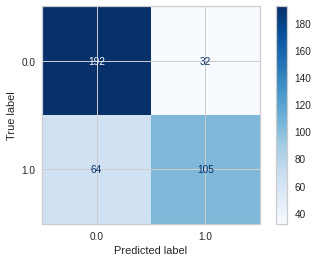

In [80]:
disp = plot_confusion_matrix(nb, X_test, y_test, cmap='Blues', values_format='.3g')

## **SVM**

Parâmetros da instância:

**C**= parâmetro de regularização que controla o quão fortemente o modelo tenta minimizar o erro, usado evitar o overfitting. Quanto menor o valor de C, maior será o grau de regularização e, portanto, o modelo será menos complexo.

**cache_size** = Tamanho do cache (MB). Aumentar isso pode melhorar o tempo de treinamento em grandes conjuntos de dados.

**degree** = Quando o degree é maior, o modelo fica mais complexo e pode levar a um overfitting nos dados de treinamento. Por outro lado, valores mais baixos de degree resultam em um modelo mais simples e menos suscetível ao overfitting, mas também podem levar a uma menor acurácia nos dados de teste.

**gamma** = Valores mais altos de gamma resultam em uma maior complexidade do modelo e podem levar a um overfitting nos dados de treinamento. Isso ocorre porque o SVM vai tentar ajustar o modelo de maneira muito precisa aos dados de treinamento, o que pode ser prejudicial quando o objetivo é prever novos dados. Por outro lado, valores mais baixos de gamma resultam em um modelo mais simples e menos suscetível ao overfitting, mas também podem levar a uma menor acurácia nos dados de teste.

**kernel** = Tipo de kernel: 'linear', 'poly', 'rbf'(padrão), 'sigmoid', 'precomputed'ou uma função.

**probability**= Se definido como True, o SVM vai calcular a probabilidade de cada classe para cada dado de entrada. Isso pode ser útil em alguns casos, como quando se deseja ter uma medida da certeza do modelo em suas previsões. Retarda o treinamento. Em geral, o parâmetro probability é opcional no SVM e pode ser útil em alguns casos específicos, mas não é necessário para a maioria das aplicações.

**shrinking**= reduzir o número de vetores de suporte selecionados durante o treinamento do modelo, o que pode levar a um modelo mais rápido e menos propenso ao overfitting.


In [81]:
from sklearn.svm import SVC
svc = SVC(random_state=42, probability=False)
svc.fit(X_train, y_train)

SVC(random_state=42)

In [82]:
svc.score(X_test, y_test)

0.8040712468193384

In [83]:
svc.support_vectors_

array([[ 0.82524778, -0.04969778, -0.49861561, ...,  0.        ,
         0.        ,  1.        ],
       [-1.55188105,  2.60129474, -0.49861561, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.82524778, -0.40056443, -0.49861561, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.82524778, -0.28360888, -0.49861561, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.82524778, -0.28708081, -0.49861561, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82524778, -0.20563851, -0.49861561, ...,  0.        ,
         0.        ,  1.        ]])

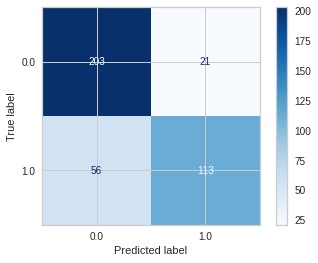

In [84]:
disp = plot_confusion_matrix(svc, X_test, y_test, cmap='Blues', values_format='.3g')

## **KNN**
**metric** = Métrica de distância. As métricas de distância incluem: 'euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis', 'haversine' , 'hamming', 'canberra', 'braycurtis', 'jaccard', 'matching', 'dice', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', ou um callable (definido pelo usuário).

**n_neighbors** = Número de vizinhos.

**p** = é usado para controlar a forma como a distância entre os pontos de dados é medida. Ele é definido como um valor inteiro maior ou igual a 1.

Parâmetro de potência de Minkowski: 
1 = manhattan (L1) - a soma dos valores absolutos das diferenças em cada dimensão. 
2 = Euclidiano (L2) - a distância é medida como a raiz quadrada da soma dos quadrados das diferenças em cada dimensão. 

Para valores maiores que 2, a distância é medida como a raiz p-ésima da soma dos p-ésimos poderes das diferenças em cada dimensão. Isso é conhecido como distância Lp.

**weights** = é usado para controlar a forma como os votos dos vizinhos mais próximos são contabilizados para prever a classe de um dado de entrada. Ele pode ser definido como "uniform" caso  todos os vizinhos mais próximos têm o mesmo peso na votação final. , 'distance', caso em que os pontos mais próximos têm mais influência.



In [85]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [86]:
knc.score(X_test, y_test)

0.7735368956743003

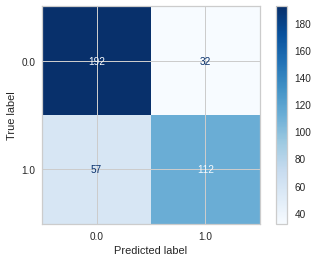

In [87]:
disp = plot_confusion_matrix(knc, X_test, y_test, cmap='Blues', values_format='.3g')

## **Árvores de Decisão**
Instance parameters:

**criterion** = especifica a função de custo utilizada para medir a qualidade da divisão de um nó. Os valores possíveis são "gini" para o índice de Gini e "entropy" para a entropia.

**max_depth** = especifica a profundidade máxima da árvore. Isso pode ser usado para controlar a complexidade do modelo e evitar o overfitting.

**max_features** = especifica o número máximo de características consideradas em cada divisão. Isso pode ser usado para selecionar as características mais relevantes e evitar o overfitting.

**min_samples_leaf** = especifica o número mínimo de amostras em cada folha da árvore. Isso pode ser usado para evitar o overfitting ao garantir que cada folha tenha um número suficientemente grande de amostras.

**min_samples_split** = especifica o número mínimo de amostras necessárias para dividir um nó. Isso pode ser usado para evitar o overfitting ao garantir que cada nó tenha um número suficientemente grande de amostras.

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(
    random_state=42, max_depth=3,
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [89]:
dt.score(X_test, y_test)

0.8142493638676844

Quanto maior = Maior  importancia da feature (Soma igual a 1)

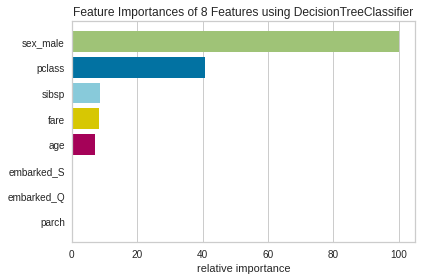

In [90]:
from yellowbrick.model_selection import (
    FeatureImportances,
)
fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(dt)
fi_viz.fit(X_train, y_train)
fi_viz.poof()

In [91]:
print(dt.feature_importances_)
print(dt.feature_names_in_)

[0.24750773 0.0432777  0.05214257 0.         0.05018218 0.60688982
 0.         0.        ]
['pclass' 'age' 'sibsp' 'parch' 'fare' 'sex_male' 'embarked_Q'
 'embarked_S']


In [92]:
pd.DataFrame(
    {
    'col_name': dt.feature_importances_
    },
    index=dt.feature_names_in_
    ).sort_values(by='col_name', ascending=False)


,col_name
sex_male,0.606890
pclass,0.247508
sibsp,0.052143
fare,0.050182
age,0.043278
parch,0.000000
embarked_Q,0.000000
embarked_S,0.000000


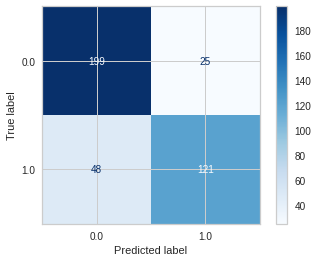

In [93]:
disp = plot_confusion_matrix(dt, X_test, y_test, cmap='Blues', values_format='.3g')

Visualizar a árvore

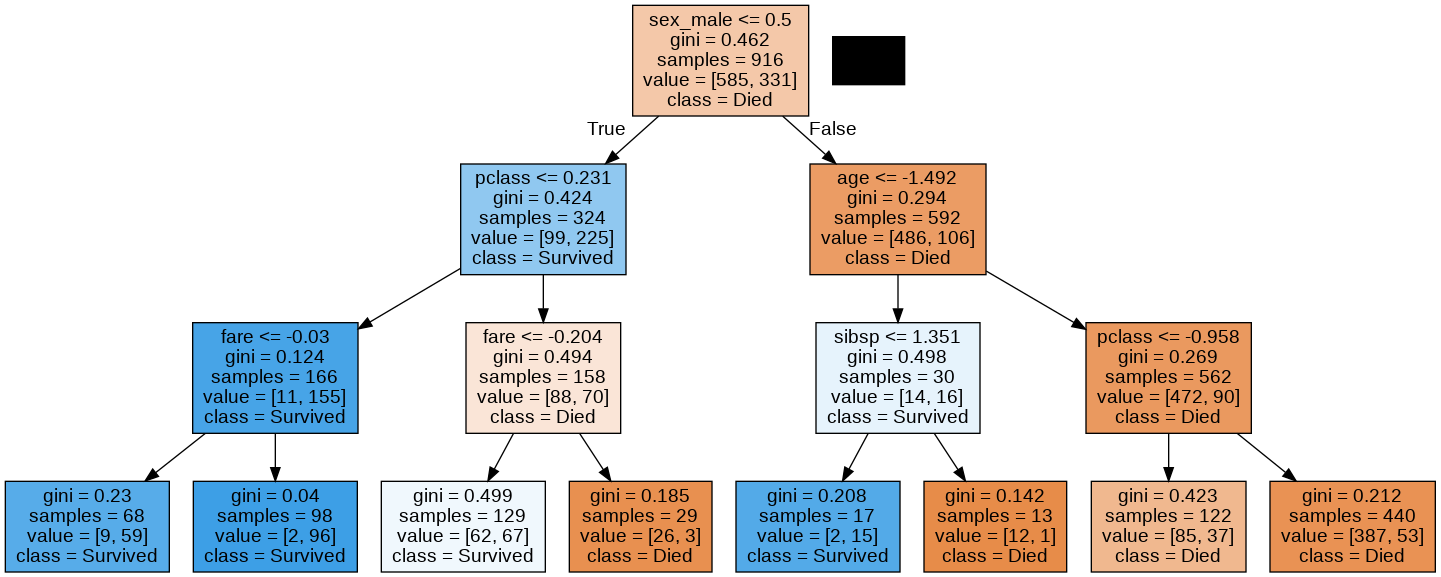

In [94]:
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz
dot_data = StringIO()

export_graphviz(
    dt,
    out_file=dot_data,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True,
)
g = pydotplus.graph_from_dot_data(
    dot_data.getvalue()
)

from IPython.display import Image
Image(g.create_png())

O pacote dtreeviz pode ajudar a entender como a árvore de decisão funciona. Ele cria uma árvore com histogramas rotulados, o que fornece informações valiosas

In [95]:
#!pip install -q dtreeviz 

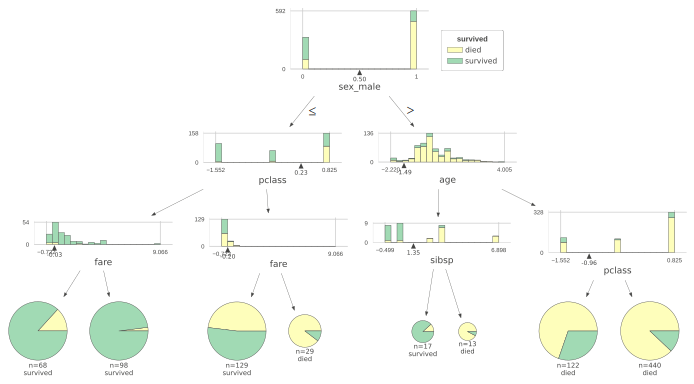

In [96]:
import dtreeviz

viz = dtreeviz.model(
    dt,
    X_train,
    y_train,
    target_name="survived",
    feature_names=X.columns,
    class_names=["died", "survived"],
)
viz.view()

## **Floresta Aleatória**
**bootstrap** = Se for True, as amostras são tiradas com reposição, o que significa que uma mesma amostra pode ser selecionada mais de uma vez na construção de uma árvore da floresta. Isso pode ajudar a melhorar a robustez e a estabilidade do modelo, já que cada árvore na floresta é construída a partir de um conjunto de amostras diferentes.

**criterion**= a função de avaliação usada para dividir os nós da árvore. As opções são "gini" para o índice de Gini e "entropy" para a entropia.

**max_depth**= profundidade máxima das árvores na floresta.

**max_features**= número máximo de características a serem consideradas para dividir um nó interno. Default is all.

**min_samples_leaf**= número mínimo de amostras necessárias para estar em um nó folha. Default é 1.

**min_samples_split**= número mínimo de amostras necessárias para dividir um nó interno. Default é 2.

**n_estimators**= número de árvores na floresta. Default é 100.

**n_jobs**= número de jobs a serem executados em paralelo. -1 significa usar todos os processadores disponíveis.

In [97]:
from sklearn.ensemble import (
    RandomForestClassifier,
)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [98]:
rf.score(X_test, y_test)

0.8040712468193384

Importância do recurso mostrando a importância do Gini (redução de erro ao usar esse recurso)

In [99]:
for col, val in sorted(
    zip(X.columns, rf.feature_importances_),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

age            0.282
fare           0.269
sex_male       0.236
pclass         0.090
sibsp          0.050


In [100]:
#!pip install rfpimp

As características que reduzem a incerteza na classificação recebem pontuações mais altas.

In [101]:
import rfpimp
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rfpimp.importances(
    rf, X_test, y_test
).Importance

Feature
sex_male      0.208651
age           0.078880
pclass        0.055980
fare          0.025445
parch         0.012723
embarked_S    0.012723
sibsp         0.010178
embarked_Q    0.002545
Name: Importance, dtype: float64

In [102]:
print(f'''

Quantidade de features : {rf.n_features_in_} 

Lista de features: {rf.feature_names_in_}

''')



Quantidade de features : 8 

Lista de features: ['pclass' 'age' 'sibsp' 'parch' 'fare' 'sex_male' 'embarked_Q'
 'embarked_S']




In [103]:
len(rf.estimators_)

100

In [104]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = rf.feature_names_in_, 
                   class_names=['died','survived'],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

Output hidden; open in https://colab.research.google.com to view.

## **XGBoost**

**max_depth** = profundidade máxima da árvore. Valores maiores podem levar a modelos mais complexos e melhor ajuste aos dados, mas também podem aumentar o risco de overfitting. Default 3.

**learning_rate or eta** = taxa de aprendizado utilizada para ajustar os pesos dos modelos na sequência de árvores. Ele é usado para determinar o quão rapidamente o modelo deve aprender a partir dos dados de treinamento. É importante notar que o learning_rate é um hiperparâmetro que afeta diretamente o desempenho do modelo XGBoost. Portanto, é importante experimentar diferentes valores de learning_rate e escolher o que melhor se ajusta aos seus dados e problema específicos. Default 0.1.

**n_estimators** = número de árvores a serem construídas na sequência. Valores maiores podem levar a modelos mais precisos, mas também podem aumentar o tempo de treinamento e a complexidade do modelo. Default 100.

**subsample**= proporção da amostra de treinamento usada para treinar cada árvore. Valores mais baixos podem ajudar a reduzir o overfitting e aumentar a velocidade do treinamento. Default 1.

**colsample_bytree** = proporção de colunas de dados usadas para construir cada árvore. Valores mais baixos podem ajudar a reduzir o overfitting e aumentar a velocidade do treinamento. Default 1.

**gamma** =  Ele é usado para controlar a quantidade de informação que uma árvore de decisão pode absorver a partir dos dados de treinamento. Valores mais altos de gamma significam que as árvores só podem absorver muito pouca informação dos dados de treinamento, o que pode levar a modelos mais simples e menos propensos ao overfitting. Valores mais baixos de gamma significam que as árvores podem absorver mais informação dos dados de treinamento, o que pode levar a modelos mais complexos e melhor ajuste aos dados, mas também pode aumentar o risco de overfitting Default 0.
 
**min_child_weight**= Quando o min_child_weight é um valor alto, as árvores de decisão são forçadas a ter nós folha com um número maior de exemplos de treinamento. Isso pode levar a modelos mais simples e menos propensos ao overfitting. Valores mais baixos de min_child_weight permitem que as árvores fiquem mais complexas e se ajustem melhor aos dados, mas também aumentam o risco de overfitting. Default 1.



In [107]:
import xgboost as xgb
xgb_class = xgb.XGBClassifier(random_state=42)
xgb_class.fit(
    X_train,
    y_train,
    early_stopping_rounds=10,
    eval_set=[(X_test, y_test)],
)

[0]	validation_0-error:0.188295
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.188295
[2]	validation_0-error:0.188295
[3]	validation_0-error:0.188295
[4]	validation_0-error:0.188295
[5]	validation_0-error:0.188295
[6]	validation_0-error:0.203562
[7]	validation_0-error:0.203562
[8]	validation_0-error:0.203562
[9]	validation_0-error:0.203562
[10]	validation_0-error:0.203562
Stopping. Best iteration:
[0]	validation_0-error:0.188295



XGBClassifier(random_state=42)

In [106]:
xgb_class.score(X_test, y_test)

0.811704834605598

In [109]:
for col, val in sorted(
    zip(
        X.columns,
        xgb_class.feature_importances_,
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

sex_male       0.665
pclass         0.155
sibsp          0.069
embarked_S     0.042
age            0.038


Importância dos atributos mostrando o peso (quantas vezes um atributo aparece nas árvores).

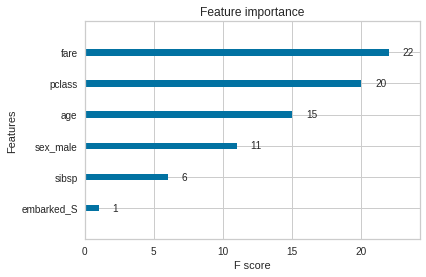

In [111]:
fig, ax = plt.subplots(figsize=(6, 4))
xgb.plot_importance(xgb_class, ax=ax)

Importância do recurso Yellowbrick para XGBoost (normalizado para 100).

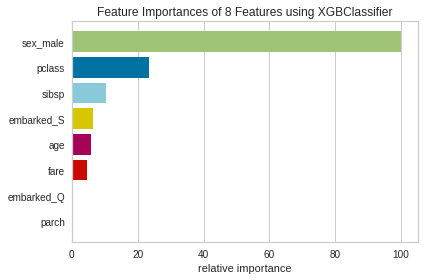

In [112]:
fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(xgb_class)
fi_viz.fit(X, y)
fi_viz.poof()


O XGBoost fornece uma representação textual das árvores e uma representação gráfica

In [115]:
booster = xgb_class.get_booster()
print(booster.get_dump()[0])

0:[sex_male<0.5] yes=1,no=2,missing=1
	1:[pclass<0.23096557] yes=3,no=4,missing=3
		3:leaf=0.169411764
		4:[fare<-0.203860044] yes=7,no=8,missing=7
			7:leaf=0.00751879672
			8:leaf=-0.139393941
	2:[age<-1.49214959] yes=5,no=6,missing=5
		5:[sibsp<1.35050142] yes=9,no=10,missing=9
			9:leaf=0.123809531
			10:leaf=-0.129411772
		6:[pclass<-0.957598865] yes=11,no=12,missing=11
			11:leaf=-0.0761904791
			12:leaf=-0.150450453



versão gráfica da primeira árvore no modelo

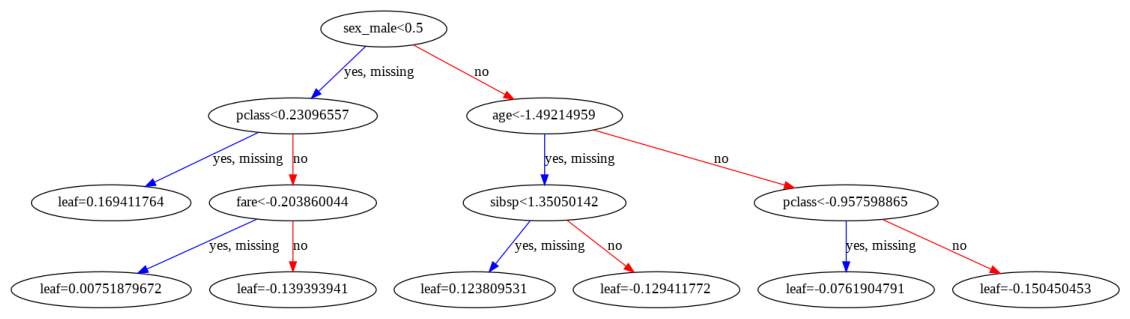

In [118]:
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_tree(xgb_class, ax=ax, num_trees=0)

 O valor na folha é o score da classe 1. Pode ser convertido em probabilidade usando a função logística. Se as decisões caírem na folha 9, a probabilidade da classe 1 é de 53%. Esta é a pontuação de uma única árvore. Se nosso modelo tivesse 100 árvores, você somaria o valor de cada folha e obteria a probabilidade com a função logística:

In [129]:
# score from first tree leaf 9
1 / (1 + np.exp(-1 * 0.1238))

0.5309105310475829

O pacote **xgbfir** é uma biblioteca construída sobre o XGBoost. Esta biblioteca fornece várias medidas sobre a importância do recurso. O que é único é que ele fornece essas medidas sobre as colunas e também pares de colunas, para que você possa ver as interações. A interface é simplesmente uma exportação para uma planilha, então usaremos pandas para lê-los de volta.

**Gain**
Ganho total de cada recurso ou interação de recurso

**FScore**
Quantidade de divisões possíveis tomadas em um recurso ou interação de recurso

**wFScore**
Quantidade de divisões possíveis realizadas em um recurso ou interação de recurso, ponderada pela probabilidade de ocorrência das divisões

**Average wFScore**
wFScoredividido porFScore

**Average Gain**
Gaindividido porFScore

**Expected Gain**
Ganho total de cada recurso ou interação de recurso ponderado pela probabilidade de obter o ganho

In [122]:
#!pip install xgbfir
import xgbfir
xgbfir.saveXgbFI(
    xgb_class,
    feature_names=X.columns,
    OutputXlsxFile="fir.xlsx",
)
pd.read_excel("fir.xlsx").T

,0,1,2,3,4,5
Interaction,sex_male,pclass,fare,age,sibsp,embarked_S
Gain,1121.641029,476.288004,101.613369,87.936739,63.586951,6.512464
FScore,11,20,22,15,6,1
wFScore,11.0,9.55336,4.71332,6.986752,0.196879,0.187727
Average wFScore,1.0,0.477668,0.214242,0.465783,0.032813,0.187727
Average Gain,101.967366,23.8144,4.61879,5.862449,10.597825,6.512464
Expected Gain,1121.641029,185.931429,21.730644,49.199736,2.085793,1.222565
Gain Rank,1,2,3,4,5,6
FScore Rank,4,2,1,3,5,6
wFScore Rank,1,2,4,3,5,6


A partir desta tabela, vemos classificações de sex_male tem uma posição elevada em Gaub, Average wFScore, Average Gain e Expected Gain, enquanto fare atinge o máximo em FScore e wFScore.

In [123]:
#pares de interações de coluna
pd.read_excel(
    "fir.xlsx",
    sheet_name="Interaction Depth 1",
).head(2).T

,0,1
Interaction,pclass|sex_male,age|sex_male
Gain,1781.13413,920.430076
FScore,15,6
wFScore,6.489478,3.871531
Average wFScore,0.432632,0.645255
Average Gain,118.742275,153.405013
Expected Gain,703.413833,594.171618
Gain Rank,1,2
FScore Rank,2,4
wFScore Rank,1,3


In [124]:
#trinca
pd.read_excel(
    "fir.xlsx",
    sheet_name="Interaction Depth 2",
).head(1).T

,0
Interaction,fare|pclass|sex_male
Gain,2516.761191
FScore,19
wFScore,3.375548
Average wFScore,0.17766
Average Gain,132.461115
Expected Gain,445.008488
Gain Rank,1
FScore Rank,1
wFScore Rank,2


## **Gradient Boosted com LightGBM**

In [133]:
import lightgbm as lgb
lgbm_class = lgb.LGBMClassifier(
    random_state=42
)
lgbm_class.fit(X_train, y_train)

LGBMClassifier(random_state=42)

In [134]:
lgbm_class.score(X_test, y_test)

0.806615776081425

Importância do recurso com base em 'splits' (número de vezes que um recurso é usado)

In [135]:
for col, val in sorted(
    zip(cols, lgbm_class.feature_importances_),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

fare        1256.000
age         1190.000
sibsp        120.000
pclass       119.000
parch         67.000


A biblioteca LightGBM oferece suporte à criação de um gráfico de importância de recurso

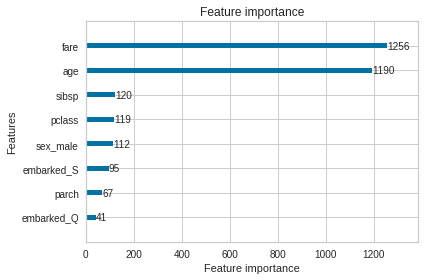

In [136]:
fig, ax = plt.subplots(figsize=(6, 4))
lgb.plot_importance(lgbm_class, ax=ax)
fig.tight_layout()

Árvore LightGBM.

In [ ]:
fig, ax = plt.subplots(figsize=(50, 50))
lgb.plot_tree(lgbm_class, tree_index=0, ax=ax)

In [ ]:
lgb.create_tree_digraph(lgbm_class)

## **TPOT**

In [ ]:
#!pip install tpot
from tpot import TPOTClassifier
tc = TPOTClassifier(generations=2)
tc.fit(X_train, y_train)

In [144]:
tc.score(X_test, y_test)

0.7811704834605598

Depois de terminar, você pode exportar o pipeline

In [145]:
tc.export("tpot_exported_pipeline.py")